In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
train_data.shape
#train_data.ndim

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets[0]

15.2

In [5]:
#Normalization of Data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [6]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [7]:
#Building Your Network
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [8]:
# K-Fold Validation
import numpy as np
k = 4
num_val_samples = len(train_data)//k  # // returns the number instead of float 
num_epochs = 100
all_scores = []
all_mae_histories = []

for i in range(k):
    print('Processing fold #',i)
    val_data = train_data[i*num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

#val_data
#val_targets
#len(val_targets)
#len(partial_train_data)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [9]:
model = build_model()


In [10]:
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=100, batch_size=10, verbose=0)

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [14]:
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [15]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [18]:
#print(all_mae_histories)

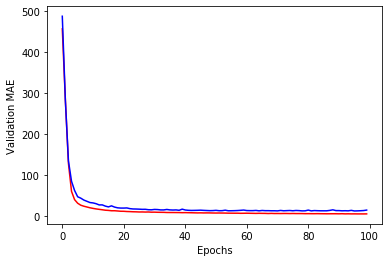

In [44]:
import matplotlib.pyplot as plt
plt.plot(history_dict['loss'], 'r')
plt.plot(history_dict['val_loss'],'b')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

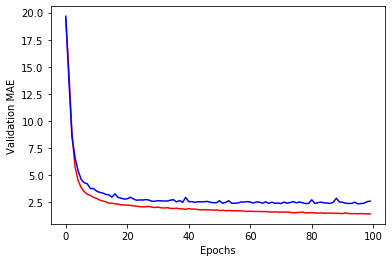

In [45]:
import matplotlib.pyplot as plt
plt.plot(history_dict['mae'], 'r')
plt.plot(history_dict['val_mae'],'b')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

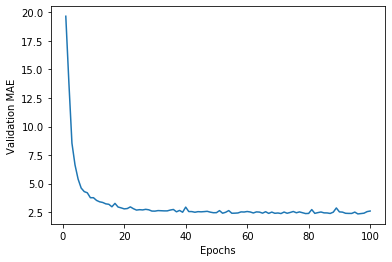

In [46]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [47]:

model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.6988 - mae: 2.4451


In [48]:
test_mse_score

15.698755264282227

In [49]:
test_mae_score

2.4451303482055664